# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Naufal Farras Pratama
- **Email:** blueshoko@gmail.com
- **ID Dicoding:** zwicky12

## Menentukan Pertanyaan Bisnis

- Faktor-faktor apa saja yang memengaruhi perkembangan kualitas udara?  
- Bagaimana perkembangan kualitas udara tiap tahun?
- Bagaimana kualitas udara tiap daerah tiap tahunnya? 

## Import Semua Packages/Library yang Digunakan

In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [243]:
city_a = pd.read_csv('./data/PRSA_Data_Aotizhongxin_20130301-20170228.csv')
city_a.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


Penjelasan tiap column
- No : index
- year : tahun
- month  : bulan
- day : hari 
- pm2.5 : konsentrasi particulate matter sama dengan 2.5 or less (micrograms per cubic meter)
- pm10 : konsentrasi particulate matter sama dengan 10 or less (micrograms per cubic meter)
- SO2 : konsentrasi sulfur dioxide (microgams per cubic meter)
- NO2 : konsentrasi nitrogen dioxide (microgams per cubic meter)
- CO : konsentrasi ozone
- NO2 : konsentrasi nitrogen dioxide
- TEMP : temperatur (in celcius??)
- PRES : tekanan atmosfer (in hPa??)
- DEWP : Dew point temperatur
- wd : arah angin
- WSPM : kecepatan angin (in m/s)
- station : tempat diambilnya data 

In [244]:
city_b = pd.read_csv('./data/PRSA_Data_Changping_20130301-20170228.csv')
city_b.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


In [245]:
city_b.nunique()

No         35064
year           5
month         12
day           31
hour          24
PM2.5        481
PM10         562
SO2          294
NO2          459
CO           115
O3           886
TEMP         998
PRES         592
DEWP         602
RAIN         116
wd            16
WSPM          95
station        1
dtype: int64

kolom station memiliki 1 nilai unik yang merepresentasikan kota sebagai tempat data diambil maka tiap data csv bisa kita gabung saja menggunakan concat secara vertikal

In [246]:
city_c = pd.read_csv('./data/PRSA_Data_Dingling_20130301-20170228.csv')
city_d = pd.read_csv('./data/PRSA_Data_Dongsi_20130301-20170228.csv')
city_e = pd.read_csv('./data/PRSA_Data_Guanyuan_20130301-20170228.csv')
city_f = pd.read_csv('./data/PRSA_Data_Gucheng_20130301-20170228.csv')
city_g = pd.read_csv('./data/PRSA_Data_Huairou_20130301-20170228.csv')
city_h = pd.read_csv('./data/PRSA_Data_Nongzhanguan_20130301-20170228.csv')
city_i = pd.read_csv('./data/PRSA_Data_Shunyi_20130301-20170228.csv')
city_j = pd.read_csv('./data/PRSA_Data_Tiantan_20130301-20170228.csv')
city_k = pd.read_csv('./data/PRSA_Data_Wanliu_20130301-20170228.csv')
city_l = pd.read_csv('./data/PRSA_Data_Wanshouxigong_20130301-20170228.csv')

In [247]:

combined_data = pd.concat([city_a, city_b, city_c, city_d, city_e, city_f, city_g, city_h, city_i, city_j, city_k, city_l], ignore_index=True)
combined_data['station'].unique()

array(['Aotizhongxin', 'Changping', 'Dingling', 'Dongsi', 'Guanyuan',
       'Gucheng', 'Huairou', 'Nongzhanguan', 'Shunyi', 'Tiantan',
       'Wanliu', 'Wanshouxigong'], dtype=object)

In [248]:
combined_data.drop(['No'], axis=1, inplace=True)
combined_data.head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


Pada bagian gathering data ini kita mengetahui bahwa terdapat beberapa data csv yang merupakan data terpisah berdasarkan kota. Pada tiap kolom station hanya terdapat 1 jenis data yang melambangkan kota tempat data tersebut diambil. Maka pada keseluruhan data tersebut dapat digabungkan menggunakan concat secara vertikal karena kolomnya memiliki kesamaan. Tujuan penggabungan ini agar data lebih mudah ketika diolah. 

### Assessing Data

In [249]:
combined_data.describe()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


Dari diatas tidak terlihat adanya nilai anomali nampak bahwa periode data diambil dari tahun 2013 hingga 2017. untuk rentang waktu seperti hari, bulan dan jam sudah sesuai bila dilihat pada nilai min dan max nya. 

In [250]:
combined_data.isnull().sum()

year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

In [251]:
combined_data.duplicated().sum()

0

Bisa dilihat pada data diatas terdapat beberapa kolom yang memiliki null value namun tak memiliki nilai duplikat. 

In [252]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 17 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   year     420768 non-null  int64  
 1   month    420768 non-null  int64  
 2   day      420768 non-null  int64  
 3   hour     420768 non-null  int64  
 4   PM2.5    412029 non-null  float64
 5   PM10     414319 non-null  float64
 6   SO2      411747 non-null  float64
 7   NO2      408652 non-null  float64
 8   CO       400067 non-null  float64
 9   O3       407491 non-null  float64
 10  TEMP     420370 non-null  float64
 11  PRES     420375 non-null  float64
 12  DEWP     420365 non-null  float64
 13  RAIN     420378 non-null  float64
 14  wd       418946 non-null  object 
 15  WSPM     420450 non-null  float64
 16  station  420768 non-null  object 
dtypes: float64(11), int64(4), object(2)
memory usage: 54.6+ MB


tipe data sudah sesuai

In [253]:
zscore = pd.DataFrame([], columns=combined_data._get_numeric_data().columns)
for i in combined_data.columns:
    if combined_data[i].dtype != 'object':
        zscore[i] = (combined_data[i] - combined_data[i].mean())/combined_data[i].std()

In [254]:
combined_data[zscore[zscore[zscore._get_numeric_data().columns] > 3].notnull().any(axis=1)]

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
46,2013,3,2,22,81.0,113.0,84.0,110.0,1500.0,3.0,-0.6,1022.3,-13.9,0.0,NNE,1.4,Aotizhongxin
47,2013,3,2,23,93.0,120.0,87.0,107.0,1700.0,2.0,-0.8,1021.1,-13.4,0.0,N,1.3,Aotizhongxin
50,2013,3,3,2,110.0,132.0,98.0,99.0,2399.0,2.0,-2.8,1018.3,-12.3,0.0,NE,1.4,Aotizhongxin
51,2013,3,3,3,105.0,129.0,88.0,100.0,2500.0,2.0,-2.6,1017.2,-13.2,0.0,NE,1.2,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420469,2017,2,16,13,16.0,44.0,4.0,18.0,400.0,62.0,7.1,1014.9,-13.8,0.0,NE,6.1,Wanshouxigong
420471,2017,2,16,15,5.0,16.0,2.0,17.0,300.0,70.0,6.6,1015.7,-17.5,0.0,ENE,6.0,Wanshouxigong
420544,2017,2,19,16,30.0,118.0,3.0,13.0,400.0,80.0,10.3,1005.2,-21.3,0.0,N,6.1,Wanshouxigong
420546,2017,2,19,18,10.0,66.0,2.0,10.0,300.0,79.0,9.2,1008.8,-20.9,0.0,NNW,6.1,Wanshouxigong


pada code diatas, dilakukan perhitungan zscore pada tiap value pada tiap kolom numeric. Zscore sendiri menghitung seberapa jauh suatu data dari rata-rata dalam satuan deviasi standar. Didapat total 38 ribu lebih rows yang di indikasikan sebagai outlier dengan faktor k 3. 

### Cleaning Data

In [255]:
def handleMisValue(data):
    for i in data.columns:
        if data[i].dtype != 'object':
            data[i] = data[i].fillna(data[i].mean())
        else:
            data[i] = data[i].fillna(data[i].mode()[0])
    return data


def handleOutlier(data):
    zscore = pd.DataFrame([], columns=data._get_numeric_data().columns)
    for i in data.columns:
        if data[i].dtype != 'object':
            zscore[i] = (data[i] - data[i].mean())/data[i].std()
    data.drop(data.index[zscore[zscore[zscore._get_numeric_data().columns] > 3].notnull().any(axis=1)], inplace=True)
    return data



In [256]:
clean_data = handleMisValue(combined_data)
clean_data = handleOutlier(combined_data)


In [257]:
clean_data.describe()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,381128.000000,381128.000000,381128.000000,381128.000000,381128.000000,381128.000000,381128.000000,381128.000000,381128.000000,381128.000000,381128.000000,381128.000000,381128.000000,381128.000000,381128.000000
mean,2014.668484,6.566135,15.758155,11.369044,69.780888,92.452626,13.355591,48.025046,1083.275409,55.223683,13.798582,1010.682649,2.760509,0.021865,1.654668
std,1.179312,3.387529,8.787306,6.958441,62.272384,70.783116,15.414943,30.275885,801.969172,49.351034,11.230751,10.464442,13.836133,0.158319,1.081689
min,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,2014.000000,4.000000,8.000000,5.000000,20.000000,34.000000,2.000000,24.000000,500.000000,13.000000,3.800000,1002.200000,-8.900000,0.000000,0.900000
50%,2015.000000,7.000000,16.000000,11.000000,53.000000,78.000000,7.000000,44.000000,900.000000,47.000000,15.000000,1010.200000,3.800000,0.000000,1.400000
75%,2016.000000,9.000000,23.000000,17.000000,99.000000,132.000000,17.000000,67.000000,1399.000000,79.000000,23.300000,1019.000000,15.300000,0.000000,2.200000
max,2017.000000,12.000000,31.000000,23.000000,319.000000,377.000000,80.000000,154.000000,4600.000000,224.000000,41.600000,1042.000000,29.100000,2.500000,5.400000


## Exploratory Data Analysis (EDA)

### Explore data distribution 

In [258]:
from datetime import datetime
def dateFormatting(data, drop: bool = False):
    data['time'] = data.apply(lambda row: datetime.strptime(f"{row['year']}{row['month']:02}{row['day']:02}{row['hour']:02}0000", '%Y%m%d%H%M%S'), axis=1)
    if drop:
        data.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)
    return data

def clustering(data):
    bins = [0, 50,  100, np.inf]
    labels = ['Good', 'Moderate', 'Unhealthy']
    data['PM2.5_Category'] = pd.cut(data['PM2.5'], bins=bins, labels=labels)
    return data

In [259]:
clean_data = dateFormatting(combined_data)
clean_data = clustering(clean_data)
clean_data['PM2.5_Category'].value_counts()

PM2.5_Category
Good         185769
Moderate     102316
Unhealthy     93043
Name: count, dtype: int64

In [260]:
clean_data.head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,time,PM2.5_Category
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01 00:00:00,Good
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01 01:00:00,Good
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01 03:00:00,Good
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01 04:00:00,Good
5,2013,3,1,5,5.0,5.0,18.0,18.0,400.0,66.0,-2.2,1025.6,-19.6,0.0,N,3.7,Aotizhongxin,2013-03-01 05:00:00,Good


In [261]:
combined_data.groupby('station')['PM2.5'].mean().sort_values(ascending=False)

station
Dongsi           74.284076
Gucheng          73.278922
Tiantan          72.914928
Wanshouxigong    72.263546
Guanyuan         71.846986
Nongzhanguan     71.029830
Shunyi           70.780221
Wanliu           70.655083
Aotizhongxin     70.539909
Huairou          64.528202
Changping        64.191210
Dingling         61.444893
Name: PM2.5, dtype: float64

## Visualization & Explanatory Analysis

year        Axes(0.125,0.712609;0.168478x0.167391)
month    Axes(0.327174,0.712609;0.168478x0.167391)
day      Axes(0.529348,0.712609;0.168478x0.167391)
hour     Axes(0.731522,0.712609;0.168478x0.167391)
PM2.5       Axes(0.125,0.511739;0.168478x0.167391)
PM10     Axes(0.327174,0.511739;0.168478x0.167391)
SO2      Axes(0.529348,0.511739;0.168478x0.167391)
NO2      Axes(0.731522,0.511739;0.168478x0.167391)
CO           Axes(0.125,0.31087;0.168478x0.167391)
O3        Axes(0.327174,0.31087;0.168478x0.167391)
TEMP      Axes(0.529348,0.31087;0.168478x0.167391)
PRES      Axes(0.731522,0.31087;0.168478x0.167391)
DEWP            Axes(0.125,0.11;0.168478x0.167391)
RAIN         Axes(0.327174,0.11;0.168478x0.167391)
WSPM         Axes(0.529348,0.11;0.168478x0.167391)
dtype: object

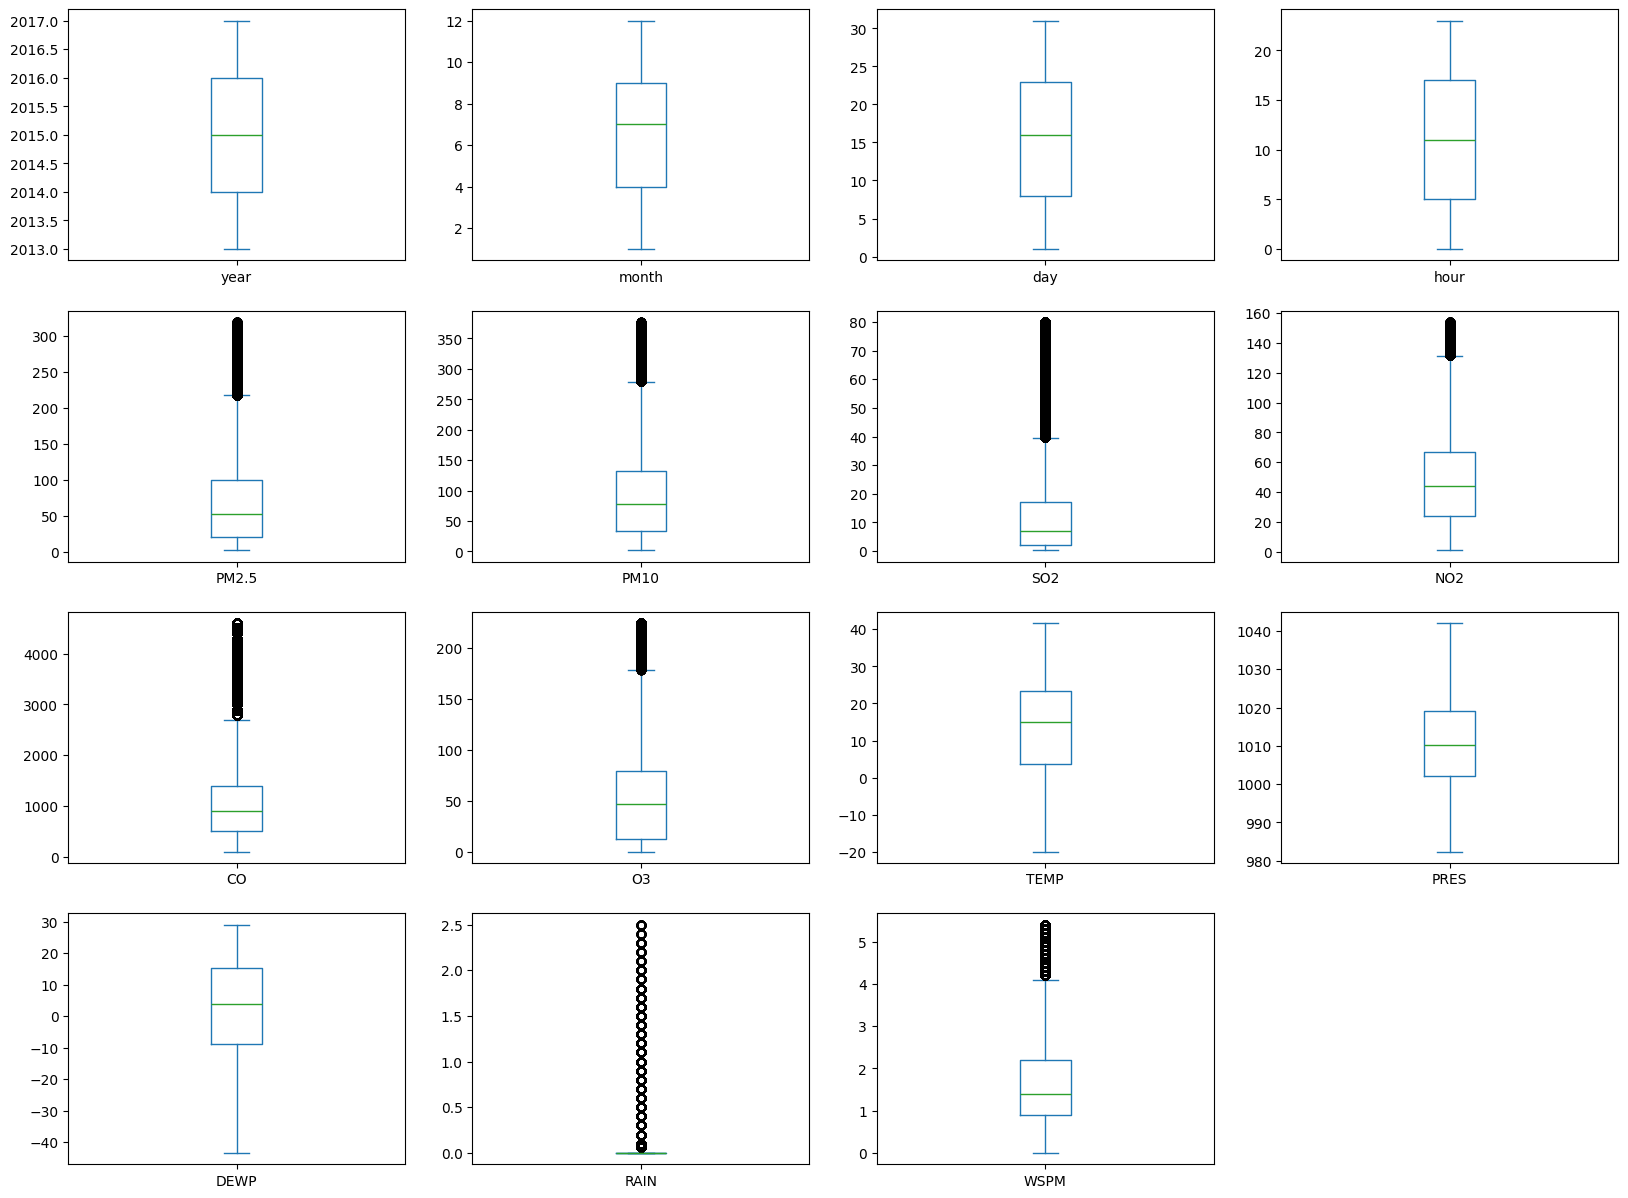

In [262]:
clean_data.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(20,15))

array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'hour'}>],
       [<Axes: title={'center': 'PM2.5'}>,
        <Axes: title={'center': 'PM10'}>,
        <Axes: title={'center': 'SO2'}>, <Axes: title={'center': 'NO2'}>],
       [<Axes: title={'center': 'CO'}>, <Axes: title={'center': 'O3'}>,
        <Axes: title={'center': 'TEMP'}>,
        <Axes: title={'center': 'PRES'}>],
       [<Axes: title={'center': 'DEWP'}>,
        <Axes: title={'center': 'RAIN'}>,
        <Axes: title={'center': 'WSPM'}>,
        <Axes: title={'center': 'time'}>]], dtype=object)

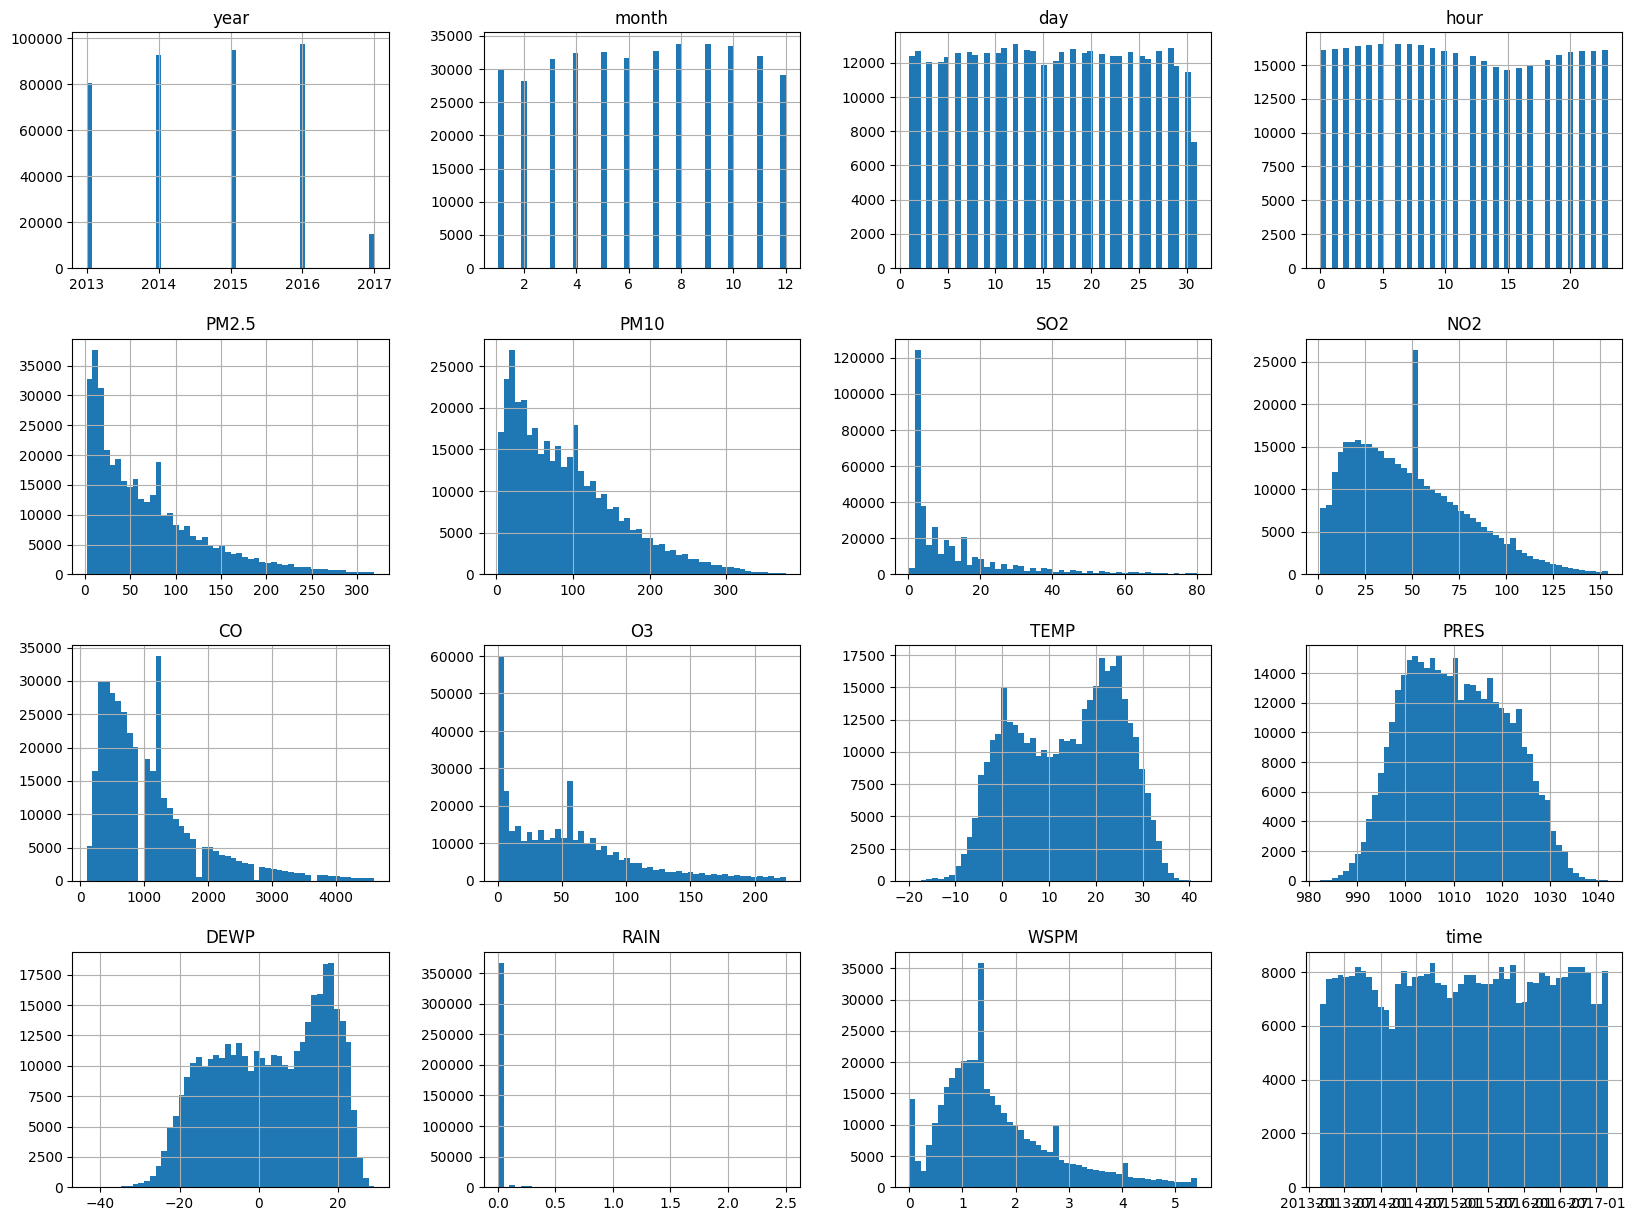

In [263]:
clean_data.hist(bins=50, figsize=(20,15))

kebanyakan distribusi grafik digambarkan sebagai right skewed, yang paling parah terdapat pada kolom RAIN. Sementara itu bila dilihat pada kolom yang terindikasi sebagai waktu memiliki distribusi yang rata namun pada kolum tahun pada data tahun 2017 terdapat selisih data yang lebih sedikit dibandingkan dengan tahun lainnya. Bila kita merujuk pada kolom time terdapat kekosongan data dengan rentang tahun kira-kira 2017-2018 yang menjadi alasan mengapa data pada tahun 2017 lebih sedikit bila dibandingkan yang lainnya. 

<Figure size 1000x600 with 0 Axes>

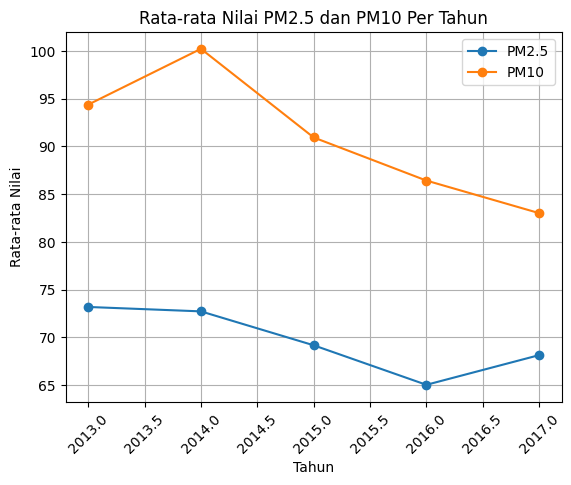

In [264]:
average_pm25_pm10_per_year = combined_data.groupby('year')[['PM2.5', 'PM10']].mean()

plt.figure(figsize=(10, 6))
average_pm25_pm10_per_year.plot(kind='line', marker='o')
plt.title('Rata-rata Nilai PM2.5 dan PM10 Per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Nilai')
plt.xticks(rotation=45)
plt.legend(['PM2.5', 'PM10'])
plt.grid(True)
plt.show()


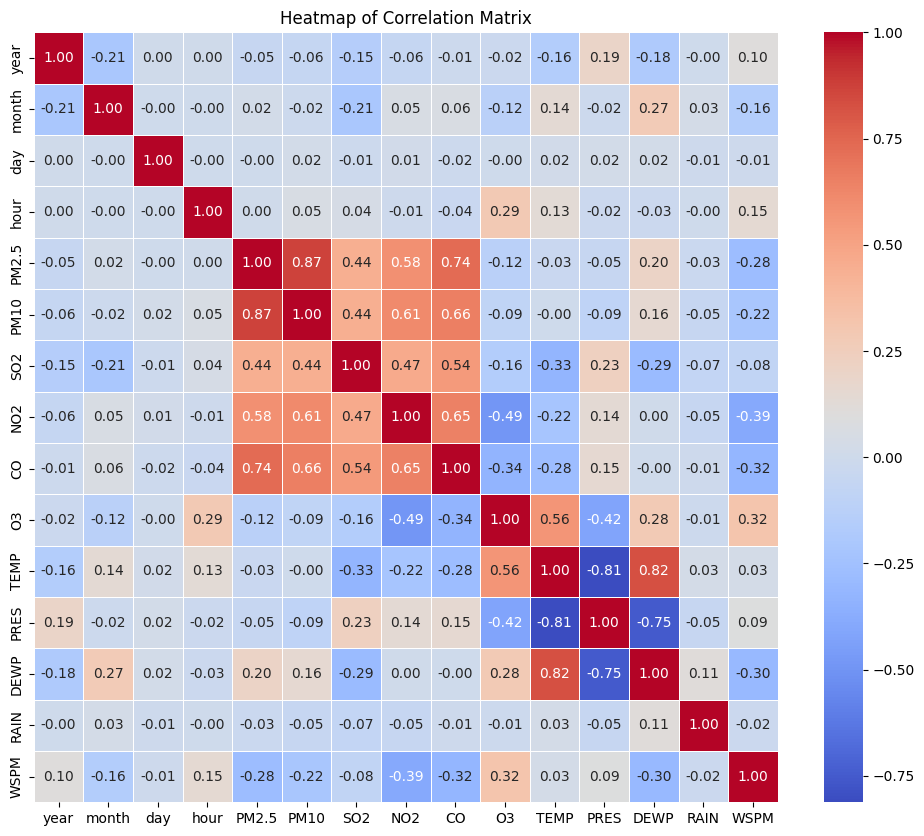

In [265]:
import seaborn as sns

corr_matrix = clean_data[clean_data._get_numeric_data().columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

plt.title('Heatmap of Correlation Matrix')
plt.show()

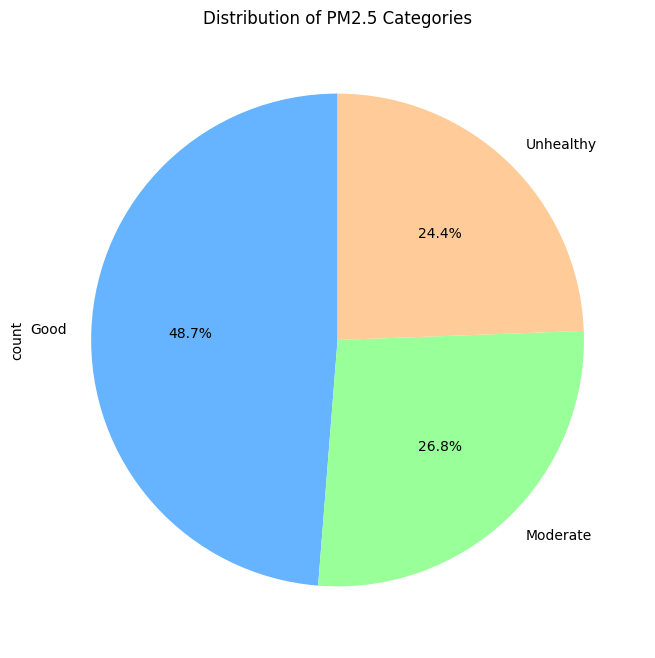

In [266]:
pm25_category_counts = clean_data['PM2.5_Category'].value_counts()
plt.figure(figsize=(8, 8))
pm25_category_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99','#ffcc99'])
plt.title('Distribution of PM2.5 Categories')
plt.show()

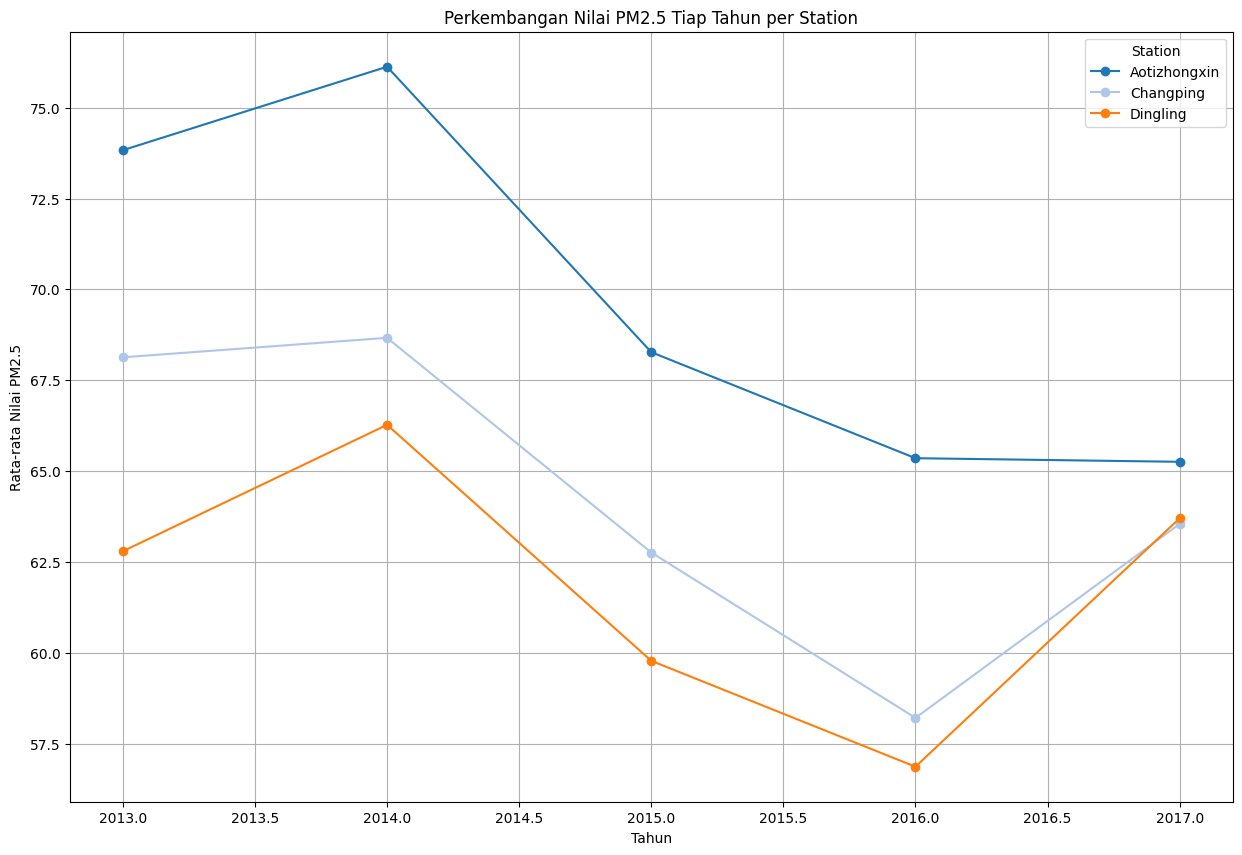

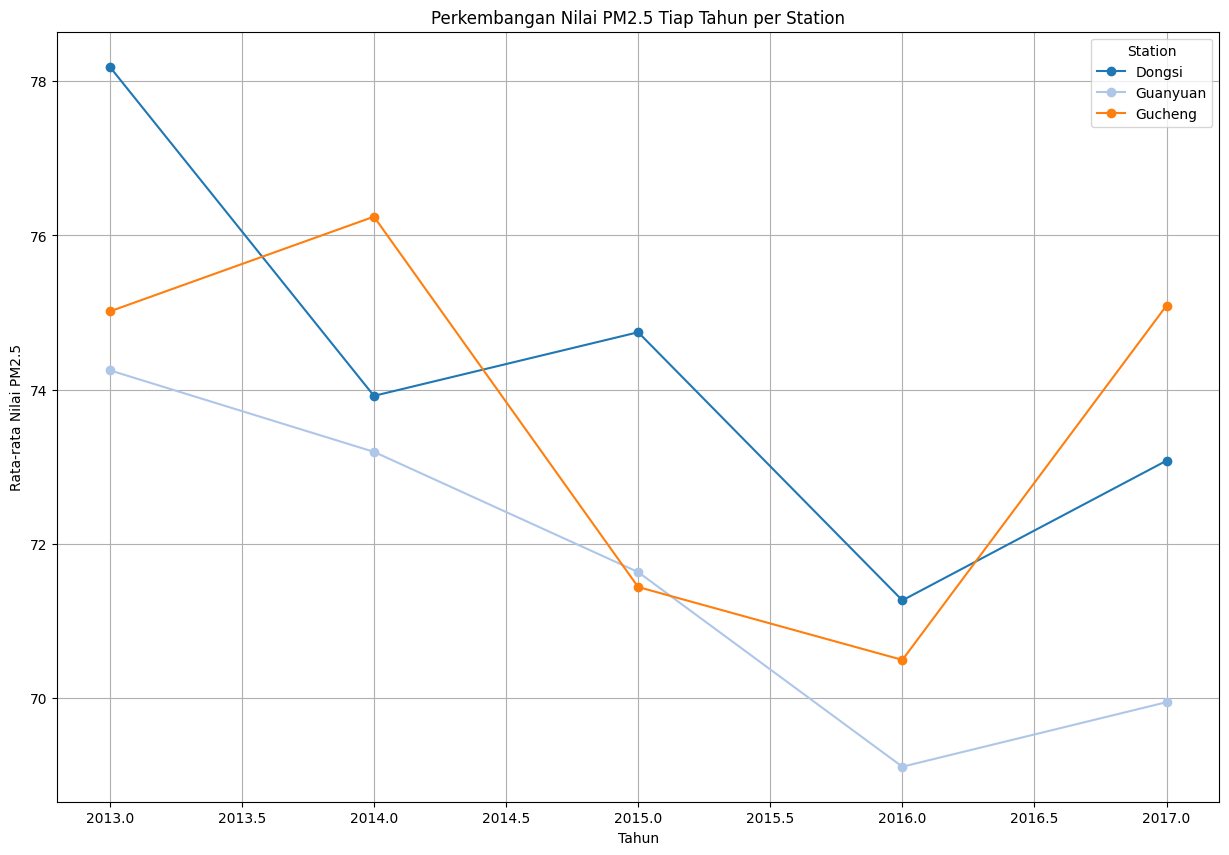

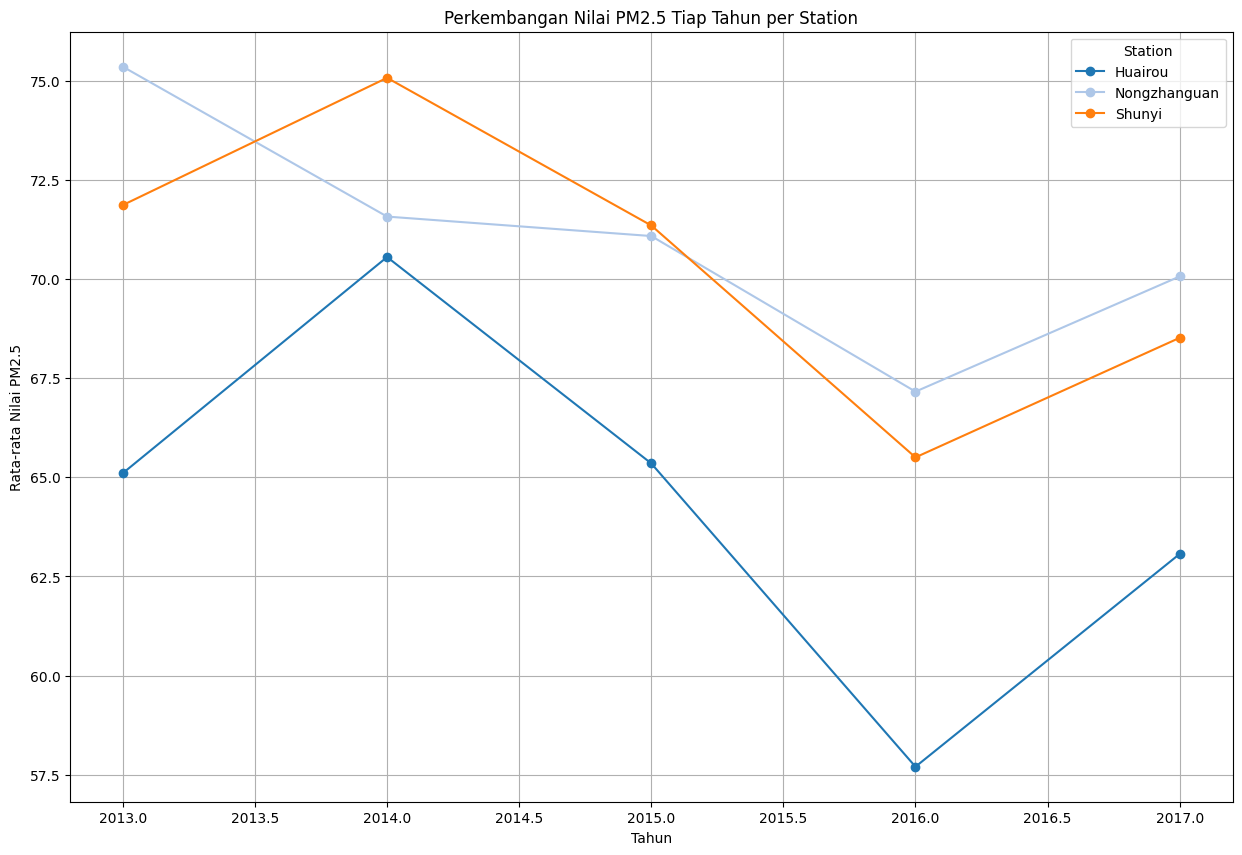

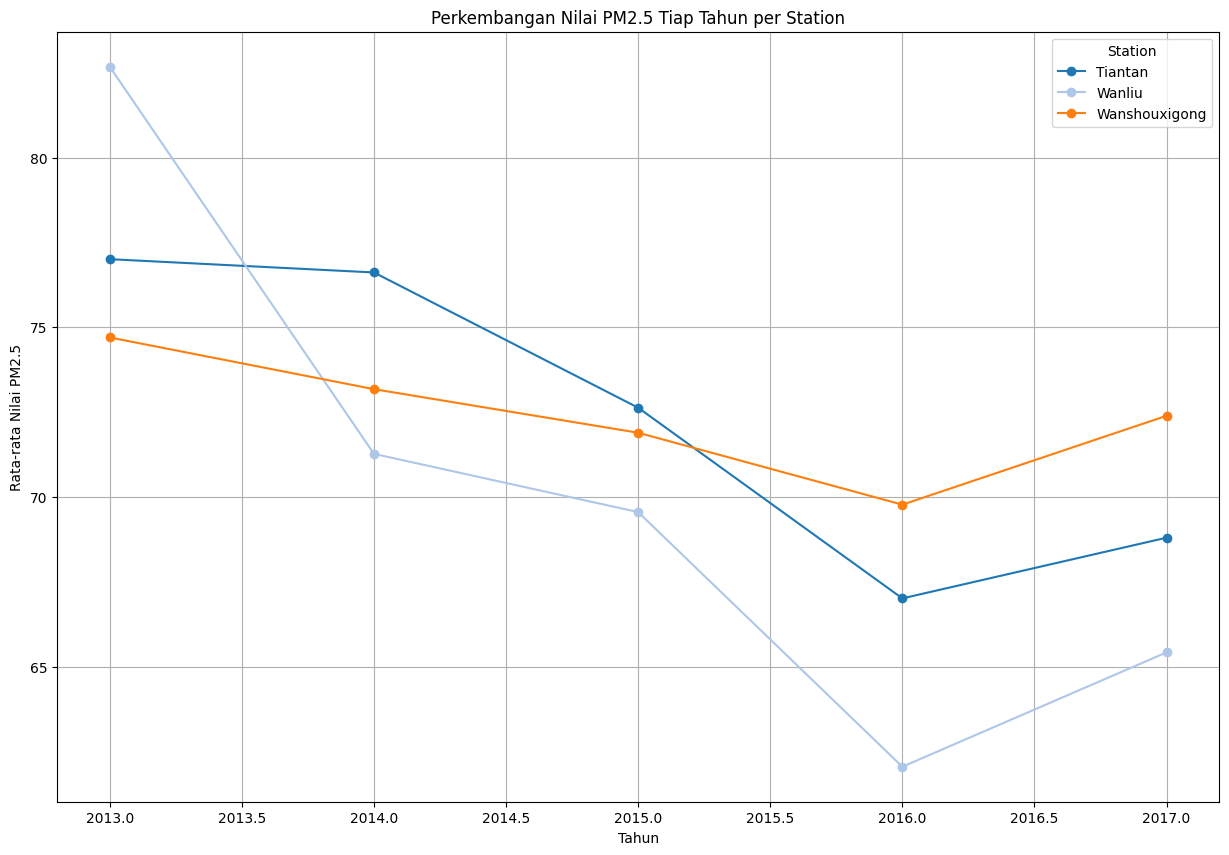

In [267]:
from cycler import cycler

stations = clean_data['station'].unique()
stations_per_figure = 3

for i in range(0, len(stations), stations_per_figure):
    subset_stations = stations[i:i + stations_per_figure]
    
    plt.figure(figsize=(15, 10))
    plt.gca().set_prop_cycle(cycler('color', plt.cm.tab20.colors))
    
    for station in subset_stations:
        station_data = clean_data[clean_data['station'] == station]
        yearly_avg_pm25 = station_data.groupby('year')['PM2.5'].mean()
        plt.plot(yearly_avg_pm25.index, yearly_avg_pm25.values, marker='o', label=station)
    
    plt.title('Perkembangan Nilai PM2.5 Tiap Tahun per Station')
    plt.xlabel('Tahun')
    plt.ylabel('Rata-rata Nilai PM2.5')
    plt.legend(title='Station')
    plt.grid(True)
    plt.show()

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
# Load the shapefile of China
china_map = gpd.read_file('./data/geo/ne_110m_populated_places.shp')
china_map

DataSourceError: './data/geo/ne_110m_populated_places.shp:Zone.Identifier' not recognized as a supported file format. It might help to specify the correct driver explicitly by prefixing the file path with '<DRIVER>:', e.g. 'CSV:path'.